# Prepare for Capital One Technical Interview

## Technical & Design Interview Guidelines

For the **Technical** Interviews:

  -  In the Hands-On/Coding Technical Interview, the primary focus will be walking through a code test or code review with your technical interviewer in your language of choice (This will include small functions, usage, algorithmic knowledge, etc.)

       - This session will be about building a data pipeline (preferred languages for building pipeline are Python, Java, or Scala - but technically you could use anything besides SQL for this part) 

       - Skills tested: scrubbing data, obtaining data, cleaning data and loading data. Once the data is loaded you will need to demonstrate querying skills (for querying data you can use SQL).  

       - Be prepared to solve code, and discuss your reasoning behind the way you solved it - dig deep for the interviewer

  -  In the **Design** focused Technical Interview, there is a specific working problem that it will centralize around:

       - Designing a data pipeline

       - Items to think about: database design concepts, Schemas, data pipeline design, Design Time Vs Run Time of the stack, Designing Data Engineering Solutions at Scale, etc.. 

       - Be prepared to utilize the whiteboarding feature in Zoom

       - Use these [System Design Primer/Topics](https://github.com/kvasukib/system-design-primer*system-design-topics-start-here) to help you prepare

  -  Some general things to also think about:

       - Core programming skills, design philosophy, risk factors, coding standards, etc.

       - Data structures, Object oriented programming & Code optimization.

       - System Design and common architectural patterns

       - API Design & Data Modeling

       - Design Tradeoffs & Performance tuning

       - What motivates you in technology, specific languages, etc.?

       - You should expect some technical questions from the interviewers related to your technical background

       - What do you see as some exciting things you may be able to bring to the table at Capital One?

## Pandas

In [1]:
from datetime import datetime
import pandas as pd

DATA_FILEPATH = r"../../data/beijing_airquality/PRSA_Data_Changping_20130301-20170228.csv"

# data = pd.read_csv(DATA_FILEPATH, chunksize=10000, header=0, index_col='No', on_bad_lines='warn')
df = pd.read_csv(DATA_FILEPATH, header=0, index_col='No', on_bad_lines='warn')

# display(df)
# df.info()
# df.describe(include='all')
df['year'].value_counts(sort=False).to_dict()

display(df)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping


#### De-duping

In [2]:
print(f"rows before de-dup: {len(df.index)}")
print(f"deduping... ")
df.drop_duplicates(subset=['year', 'month', 'day', 'hour'], inplace=True, ignore_index=True, keep='last')
print(f"rows after de-dup: {len(df.index)}")


rows before de-dup: 35064
deduping... 
rows after de-dup: 35064


#### Basic transforms

In [3]:
# dropping columns
df = df.drop(columns=['PM2.5', 'SO2', 'NO2', 'O3'], errors='ignore')
# change column names to lower case
[df.rename(columns={col: col.lower()}, inplace=True) for col in list(df.columns) if col.isupper()]
# check columns
necessary_columns = ('year', 'month', 'day', 'hour', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm', 'station')
assert all([col in list(df.columns) for col in necessary_columns]), f"Missing schema column"
# use efficient data types
print("data types before cast:")
print(df.dtypes)
df['year'] = pd.to_numeric(df['year'], downcast='unsigned')
df['month'] = pd.to_numeric(df['month'], downcast='unsigned')
df['day'] = pd.to_numeric(df['day'], downcast='unsigned')
df['hour'] = pd.to_numeric(df['hour'], downcast='unsigned')
df['pm10'] = pd.to_numeric(df['pm10'], downcast='float')
df['co'] = pd.to_numeric(df['co'], downcast='float')
df['temp'] = pd.to_numeric(df['temp'], downcast='float')
df['pres'] = pd.to_numeric(df['pres'], downcast='float')
df['dewp'] = pd.to_numeric(df['dewp'], downcast='float')
df['rain'] = pd.to_numeric(df['rain'], downcast='float')
df['wspm'] = pd.to_numeric(df['wspm'], downcast='float')
df['wd'] = df['wd'].astype('category')
df['station'] = df['station'].astype('category')
print("data types after cast:")
print(df.dtypes)
# create date
df['mdate'] = df.apply(lambda row: datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis='columns')
display(df)

data types before cast:
year         int64
month        int64
day          int64
hour         int64
pm10       float64
co         float64
temp       float64
pres       float64
dewp       float64
rain       float64
wd          object
wspm       float64
station     object
dtype: object
data types after cast:
year         uint16
month         uint8
day           uint8
hour          uint8
pm10        float32
co          float32
temp        float32
pres        float32
dewp        float32
rain        float32
wd         category
wspm        float32
station    category
dtype: object


,year,month,day,hour,pm10,co,temp,pres,dewp,rain,wd,wspm,station,mdate
0,2013,3,1,0,6.0,300.0,-2.3,1020.799988,-19.700001,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2013,3,1,1,3.0,300.0,-2.5,1021.299988,-19.000000,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,2013,3,1,2,3.0,400.0,-3.0,1021.299988,-19.900000,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,2013,3,1,3,6.0,300.0,-3.6,1021.799988,-19.100000,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,2013,3,1,4,3.0,300.0,-3.5,1022.299988,-19.400000,0.0,N,2.1,Changping,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,47.0,300.0,11.7,1008.900024,-13.300000,0.0,NNE,1.3,Changping,2017-02-28 19:00:00
35060,2017,2,28,20,12.0,500.0,10.9,1009.000000,-14.000000,0.0,N,2.1,Changping,2017-02-28 20:00:00
35061,2017,2,28,21,23.0,500.0,9.5,1009.400024,-13.000000,0.0,N,1.5,Changping,2017-02-28 21:00:00
35062,2017,2,28,22,20.0,500.0,7.8,1009.599976,-12.600000,0.0,NW,1.4,Changping,2017-02-28 22:00:00


#### Detecting and Handling nulls

In [34]:
# sum of null values
df.isnull().sum()



year          0
month         0
day           0
hour          0
pm10        582
co         1521
temp         53
pres         50
dewp         53
rain         51
wd          140
wspm         43
station       0
mdate         0
dtype: int64

In [43]:
# display any rows with nulls
ndf = df[df.isnull().any(axis=1)]
# display(ndf)

# filter columns
ndf = df[['mdate', 'year', 'month', 'day', 'hour', 'temp', 'pres']]

# let's looks only at the null values in temp
ndf = ndf[ndf['temp'].isnull()]
display(ndf)
print(ndf.shape)

,mdate,year,month,day,hour,temp,pres
16748,2015-01-27 20:00:00,2015,1,27,20,NaN,NaN
16813,2015-01-30 13:00:00,2015,1,30,13,NaN,NaN
16829,2015-01-31 05:00:00,2015,1,31,5,NaN,NaN
16873,2015-02-02 01:00:00,2015,2,2,1,NaN,NaN
16883,2015-02-02 11:00:00,2015,2,2,11,NaN,NaN
16930,2015-02-04 10:00:00,2015,2,4,10,NaN,NaN
16933,2015-02-04 13:00:00,2015,2,4,13,NaN,NaN
17007,2015-02-07 15:00:00,2015,2,7,15,NaN,NaN
17030,2015-02-08 14:00:00,2015,2,8,14,NaN,NaN
17052,2015-02-09 12:00:00,2015,2,9,12,NaN,NaN


(53, 7)


interpolate missing temperatures

In [50]:
# filter columns
xdf = df[['mdate', 'year', 'month', 'day', 'hour', 'temp', 'pres']]

# interpolate
xdf.set_index('mdate', inplace=True)
xdf['temp'] = xdf['temp'].interpolate(method='linear')

# list of missing values
filter_list = list(ndf['mdate'].unique())
xdf = xdf.loc[filter_list]
display(xdf)

/tmp/ipykernel_2234/3805193511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdf['temp'] = xdf['temp'].interpolate(method='linear')


,year,month,day,hour,temp,pres
mdate,,,,,,
2015-01-27 20:00:00,2015,1,27,20,-3.000000,NaN
2015-01-30 13:00:00,2015,1,30,13,1.500000,NaN
2015-01-31 05:00:00,2015,1,31,5,-6.000000,NaN
2015-02-02 01:00:00,2015,2,2,1,-5.000000,NaN
2015-02-02 11:00:00,2015,2,2,11,-0.500000,NaN
2015-02-04 10:00:00,2015,2,4,10,0.500000,NaN
2015-02-04 13:00:00,2015,2,4,13,3.500000,NaN
2015-02-07 15:00:00,2015,2,7,15,3.500000,NaN
2015-02-08 14:00:00,2015,2,8,14,2.500000,NaN


using `ffill()` and `bfill90`

In [61]:
# display(ndf)

xdf = df[['mdate', 'year', 'month', 'day', 'hour', 'temp', 'pres']].copy()
xdf['temp'].ffill(inplace=True)
xdf = xdf[xdf['mdate'].isin(filter_list)]
display(xdf)

/tmp/ipykernel_2234/2106664109.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdf['temp'].ffill(inplace=True)


,mdate,year,month,day,hour,temp,pres
16748,2015-01-27 20:00:00,2015,1,27,20,-2.000000,NaN
16813,2015-01-30 13:00:00,2015,1,30,13,1.000000,NaN
16829,2015-01-31 05:00:00,2015,1,31,5,-6.000000,NaN
16873,2015-02-02 01:00:00,2015,2,2,1,-4.000000,NaN
16883,2015-02-02 11:00:00,2015,2,2,11,-2.000000,NaN
16930,2015-02-04 10:00:00,2015,2,4,10,0.000000,NaN
16933,2015-02-04 13:00:00,2015,2,4,13,2.000000,NaN
17007,2015-02-07 15:00:00,2015,2,7,15,4.000000,NaN
17030,2015-02-08 14:00:00,2015,2,8,14,2.000000,NaN
17052,2015-02-09 12:00:00,2015,2,9,12,0.000000,NaN


#### Analytics

In [11]:
# average temperature per year

avg_temp = df[['year', 'temp']].groupby(['year']).agg({'temp': 'mean'})
display(avg_temp)


,temp
year,
2013,15.961397
2014,14.172512
2015,13.611296
2016,13.491580
2017,0.421493


#### Selection and Filtering Exercises

In [30]:
# filter columns
xdf = df[['year', 'mdate', 'temp', 'rain']]
xdf = xdf[xdf['year'] == 2016]
# display(xdf.iloc[0:10, :2])

# get daily average and show dates that are sub -5 degree
gdf = df[df['year'] == 2016][['year', 'month', 'day', 'temp']]
gdf = gdf.groupby(['year', 'month', 'day']).agg({'temp': 'mean'})
# filter sub -3.0 degree temps
# gdf = gdf[gdf['temp'] < -3.0]
# with query
gdf = gdf.query('temp < -3.0 & ~(year == 2017)')
# gdf.reset_index(inplace=True)
display(gdf)

temp
year month day           
2016 1     7    -3.629167
           11   -5.679167
           12   -5.725000
           17   -6.404167
           18   -9.258333
           19   -7.658333
           20   -6.229167
           21   -5.225000
           22  -10.495833
           23  -14.958333
           24   -9.562500
           27   -3.250000
           29   -4.300000
           30   -5.404167
           31   -3.979167
     2     14   -4.762500
     11    22   -4.495833
     12    28   -3.079167
           30   -4.175000

## Plotting

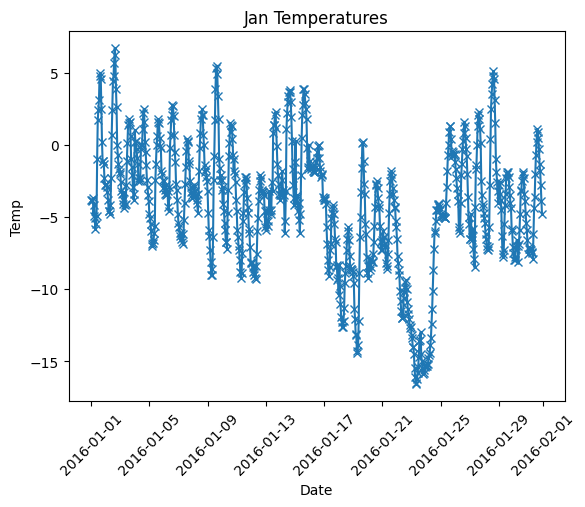

In [69]:
import matplotlib.pyplot as plt

# linear plot of temperature
vdf = df[(df['temp'].notnull()) & (df['year'] == 2016) & (df['month'] == 1)]
# vdf = vdf[['year', 'month', 'day', 'hour', 'temp']].set_index(['year', 'month', 'day', 'hour'])
vdf = vdf[['mdate', 'temp']].set_index('mdate')

# df['temp'].plot(kind='line', title='Jan Temps')

plt.plot(vdf.index, vdf['temp'], scalex=True, marker='x')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Jan Temperatures')

plt.show()